# Machine Learning - Linear regression Vs Random Forest

In [1]:
#importing Libries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
# Importing regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ridge_regression
model_lr = LinearRegression()

# converting numerics are represented in word
#from word2number import w2n
%matplotlib inline


# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(7,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Loading The Raw Data

In [3]:
#Loading the Car price Dataset
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [4]:
#Printing the shape of the data
cars.shape

(205, 26)

## Data Pre-Processing

In [4]:
# Describing the the car dataset
cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [5]:
#Finding more information about cars dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#Investigating car names 
cars.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [7]:
#From the info above there are spelling mistakes
#There multiple car model of the same brand
cars.CarName = cars.CarName.apply(lambda x: x.split(' ')[0])# split the car names
def replace_name(old,new):
    cars.CarName.replace(old,new, inplace = True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
cars.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
#Checking for duplicates
cars.loc[cars.duplicated()]

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

In [8]:
#Investigating the Dataset
for column in cars:
    unique_vals = np.unique(cars[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} --{}'.format(column,nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column,nr_values))

The number of values for feature car_ID :205
The number of values for feature symboling :6 --[-2 -1  0  1  2  3]
The number of values for feature CarName :23
The number of values for feature fueltype :2 --['diesel' 'gas']
The number of values for feature aspiration :2 --['std' 'turbo']
The number of values for feature doornumber :2 --['four' 'two']
The number of values for feature carbody :5 --['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
The number of values for feature drivewheel :3 --['4wd' 'fwd' 'rwd']
The number of values for feature enginelocation :2 --['front' 'rear']
The number of values for feature wheelbase :53
The number of values for feature carlength :75
The number of values for feature carwidth :44
The number of values for feature carheight :49
The number of values for feature curbweight :171
The number of values for feature enginetype :7 --['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
The number of values for feature cylindernumber :7 --['eight' 'five' 'four' 

In [9]:
# Checking for null values

cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Investigating the numeric values 

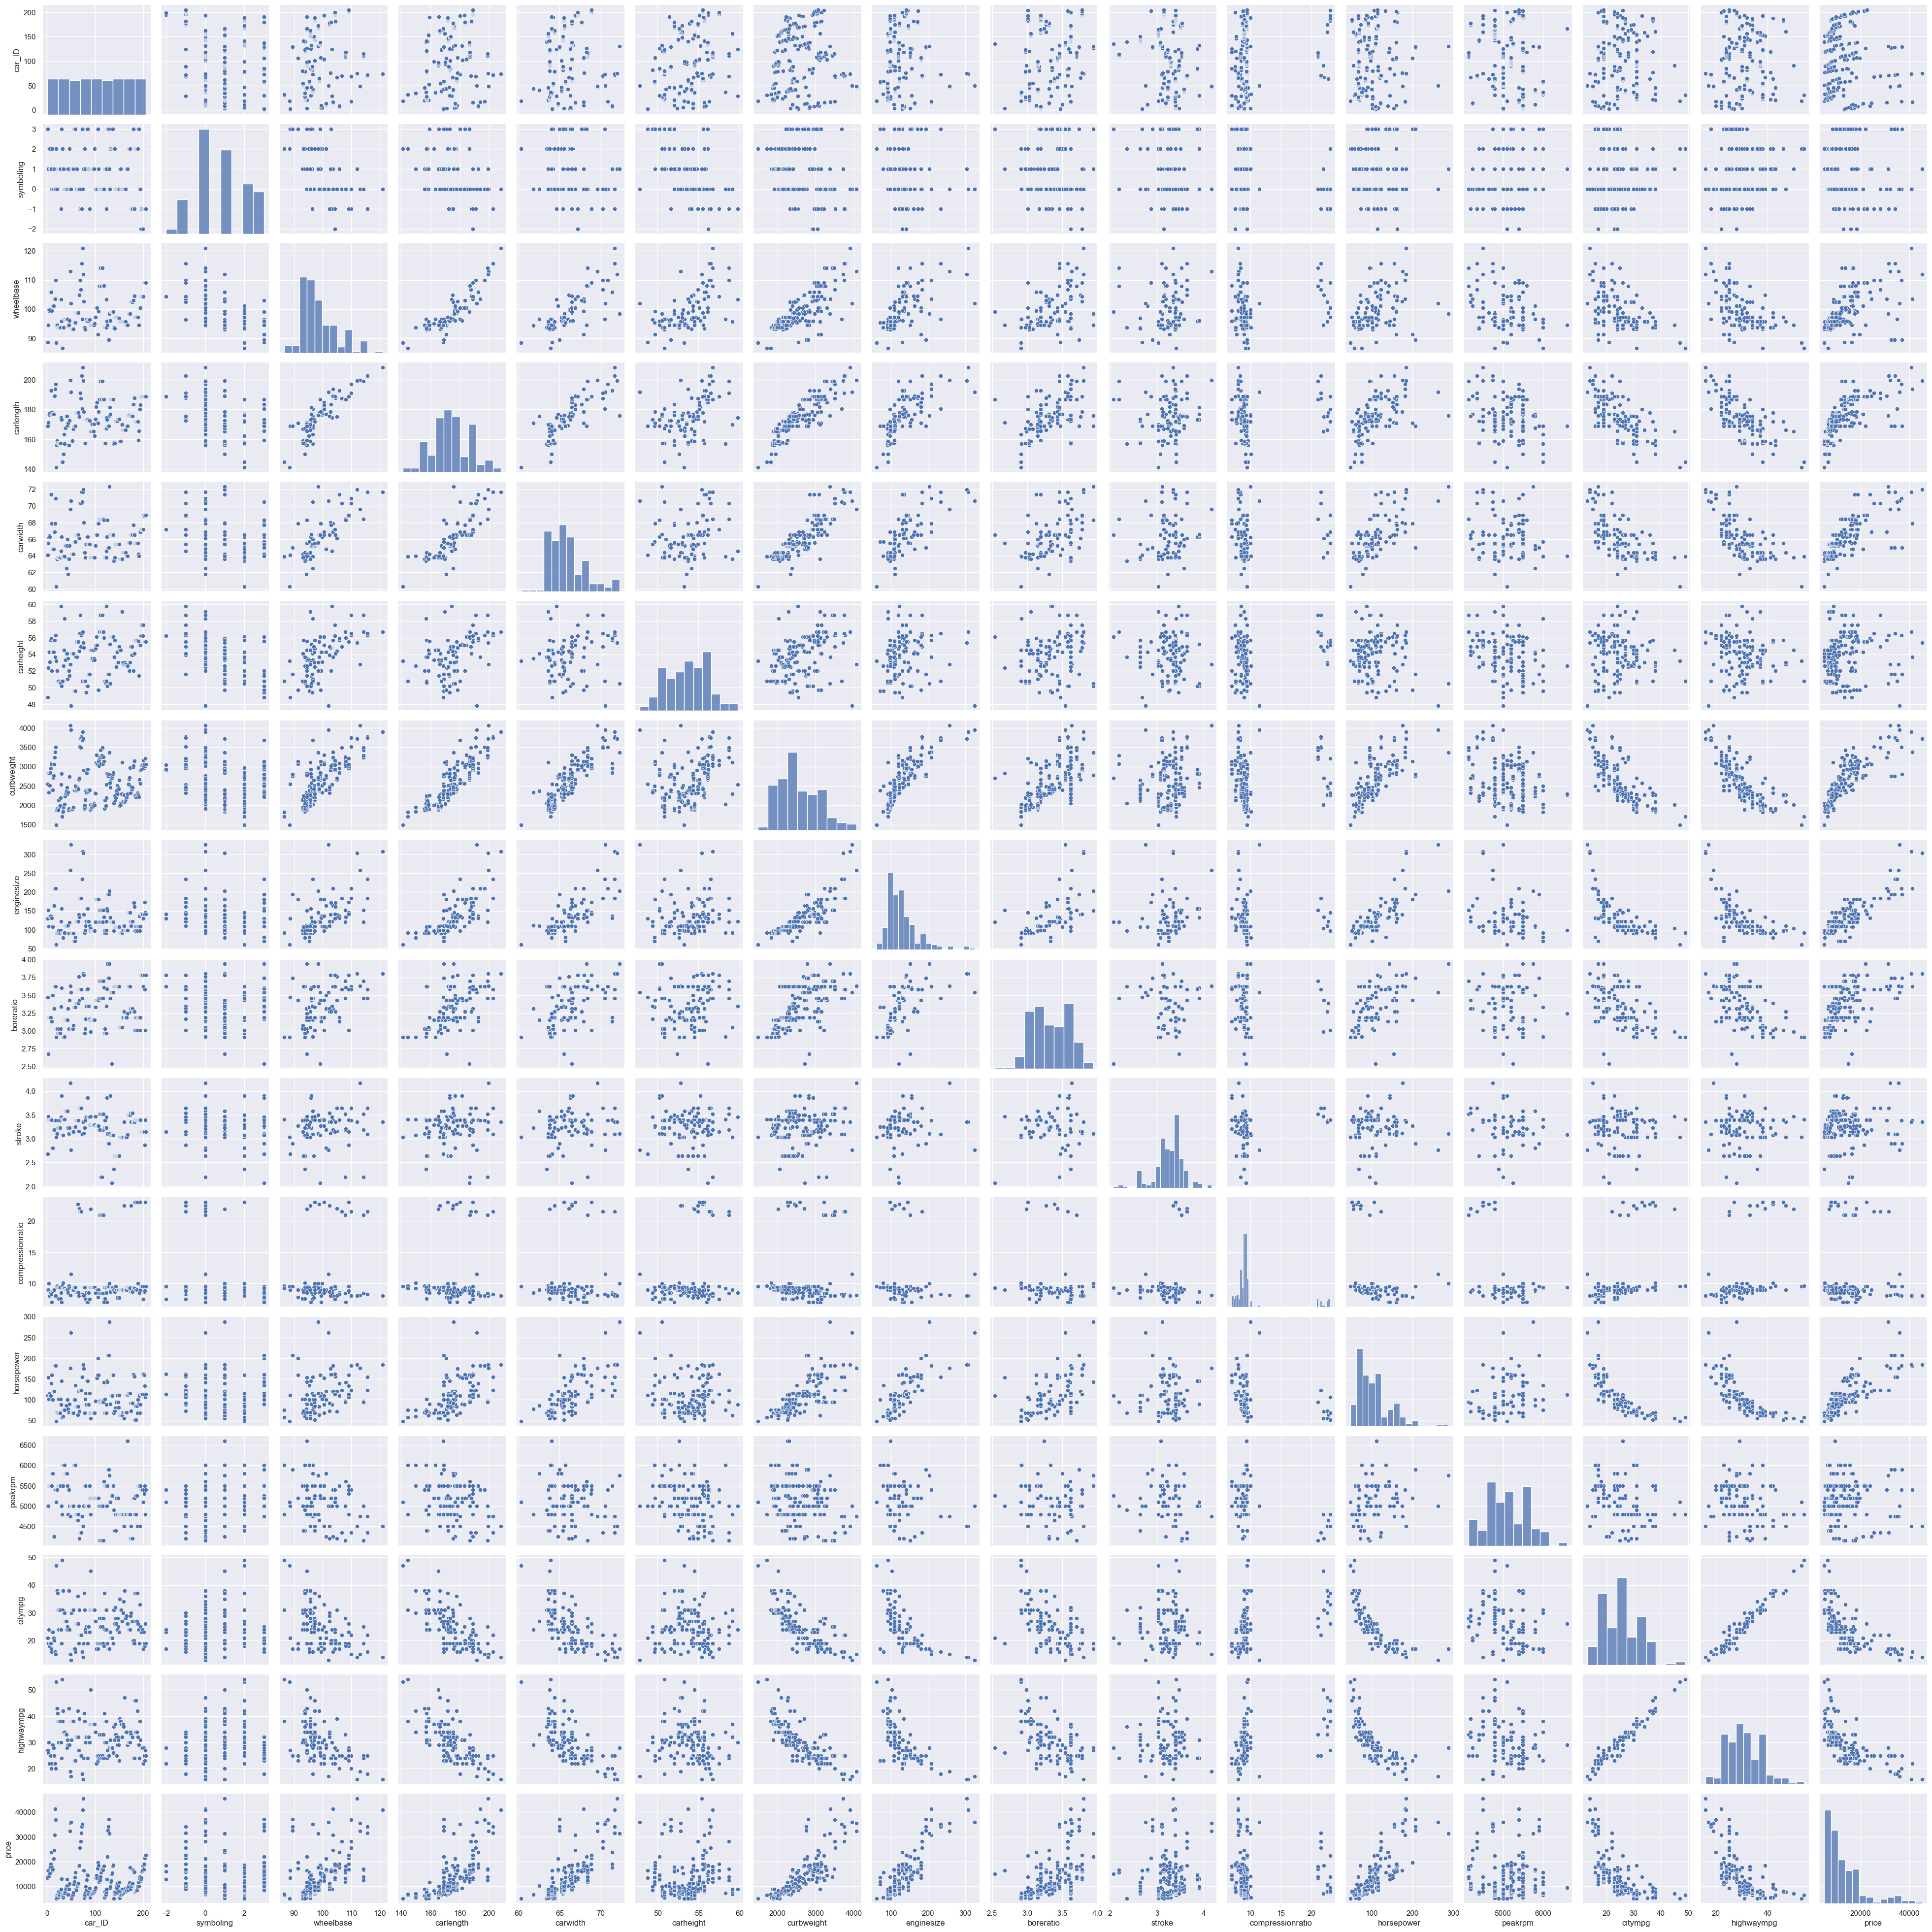

In [10]:
#Visual data set using seaborn
g = sns.pairplot(cars)

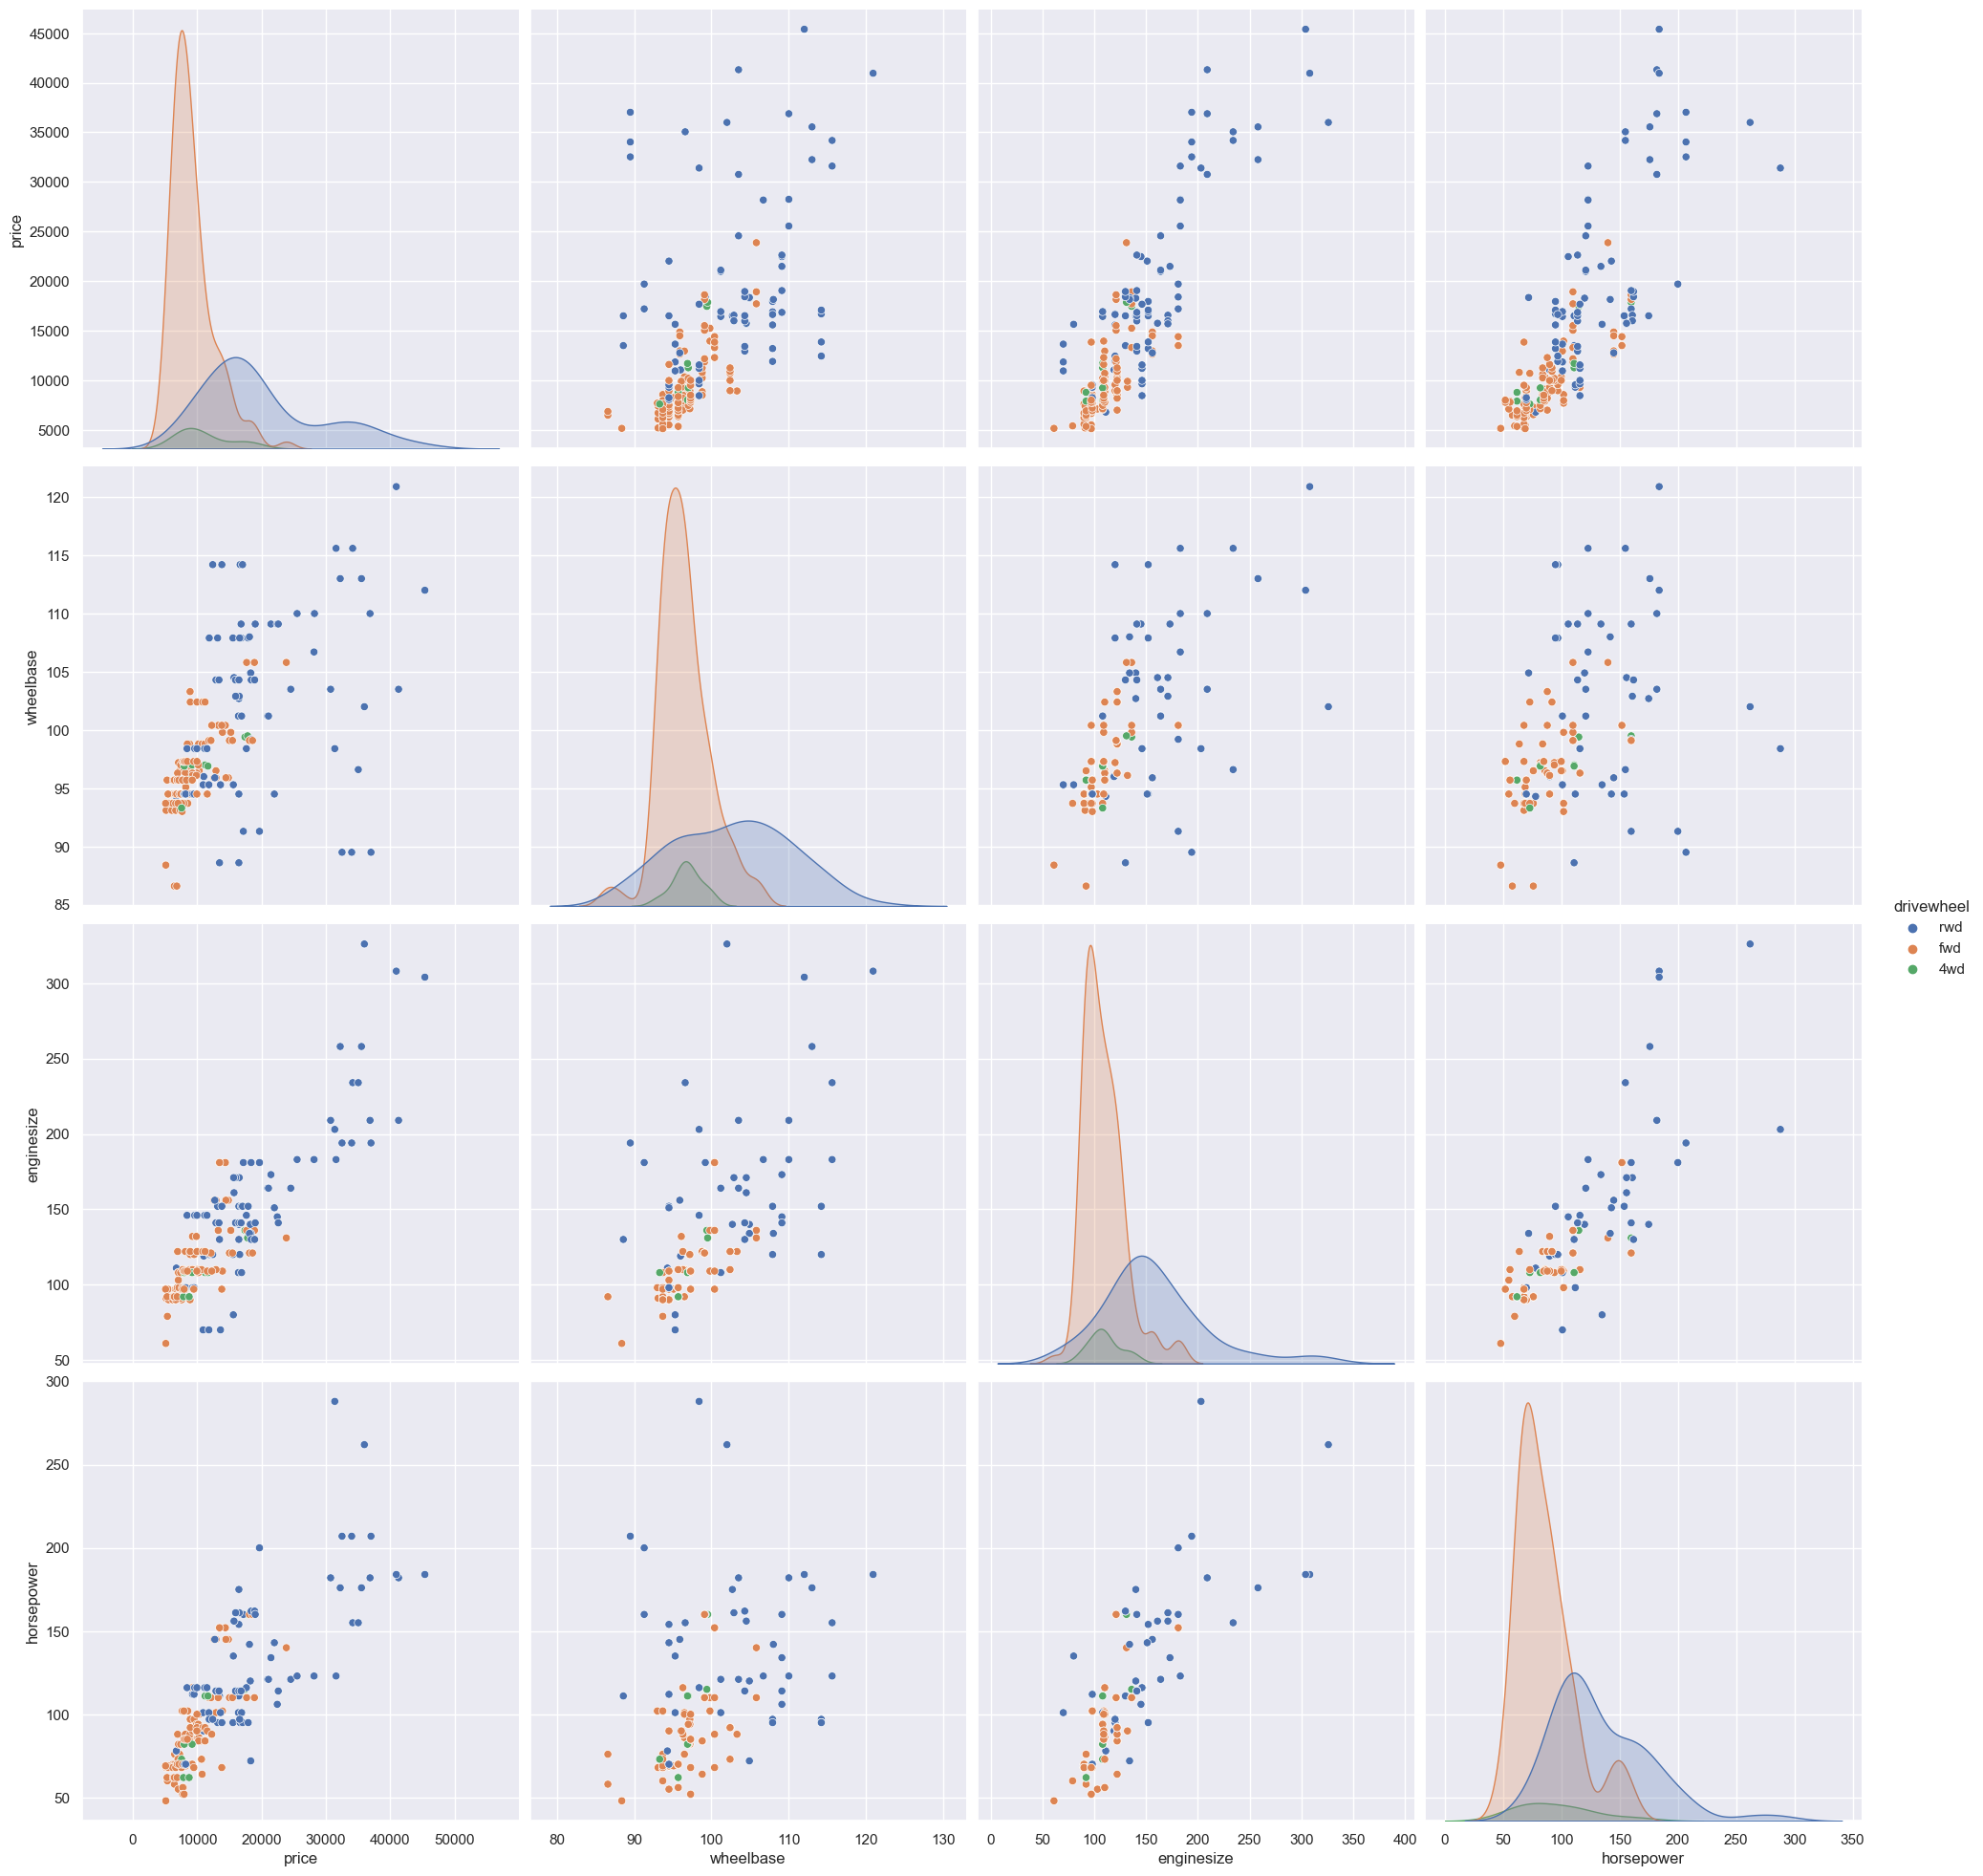

In [11]:
#Visualizing Variables with most impact on Price
g = sns.pairplot(cars[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5)


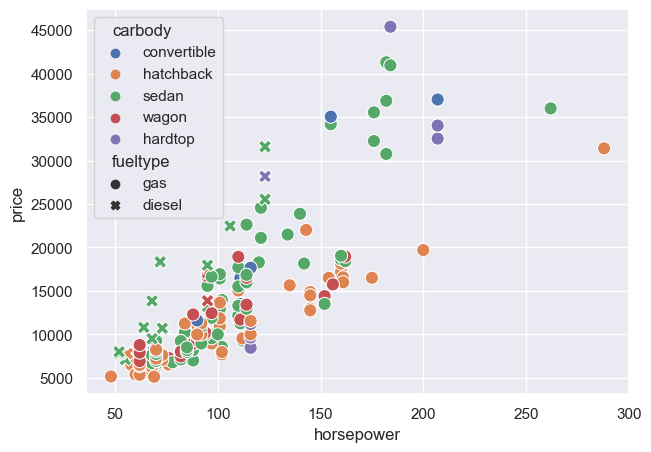

In [12]:
#Relationship between price and horsepower by carbody
ax = sns.scatterplot(x="horsepower", y="price", data=cars, hue = 'carbody', style = 'fueltype', s=90)

carbody         price
0  convertible  21890.500000
1      hardtop  22208.500000
2    hatchback  10376.652386
3        sedan  14344.270833
4        wagon  12371.960000

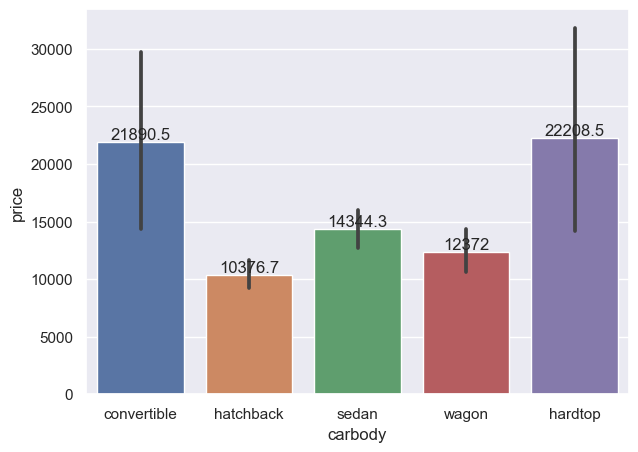

In [13]:
#Average price by carbody

ax = sns.barplot(x="carbody", y="price", data=cars)
ax.bar_label(ax.containers[0])

# Notes: 
# 1 - the lines signify the confidence interval
# 2 - Takes mean by default

cars[['carbody', 'price']].groupby('carbody', as_index = False).agg({'price':'mean'})

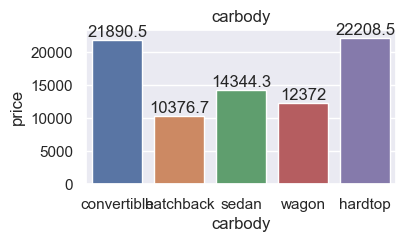

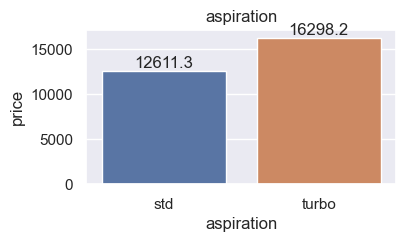

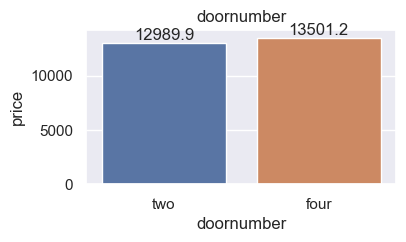

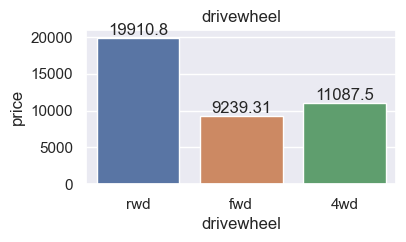

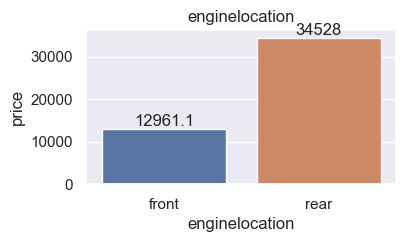

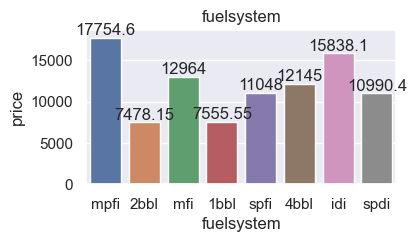

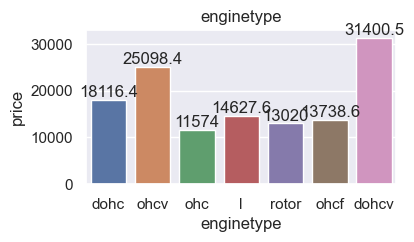

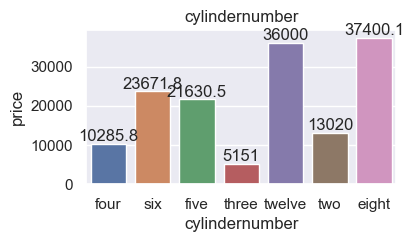

In [14]:
# Finding average price on various categories
categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(4,2)})

for c in categories:
    
    ax = sns.barplot(x=c, y="price", data=cars, ci=False) 
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


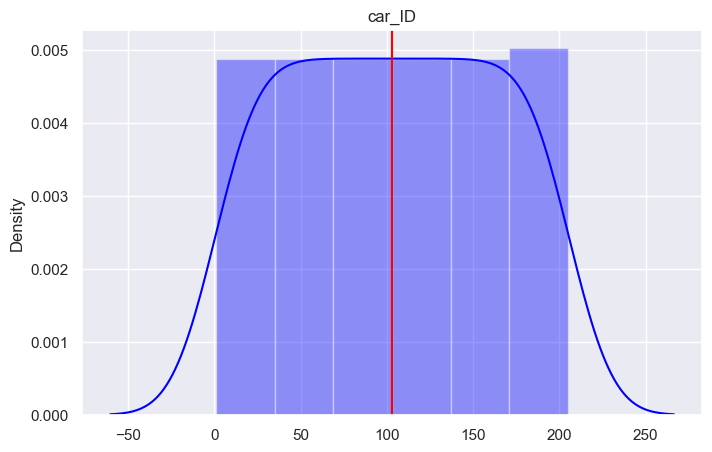

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


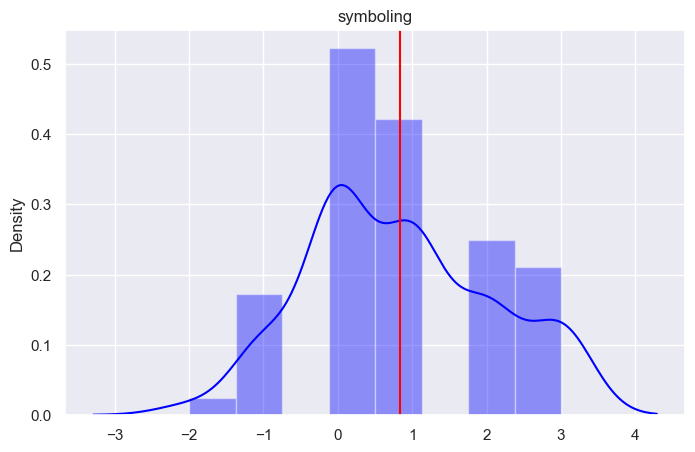

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


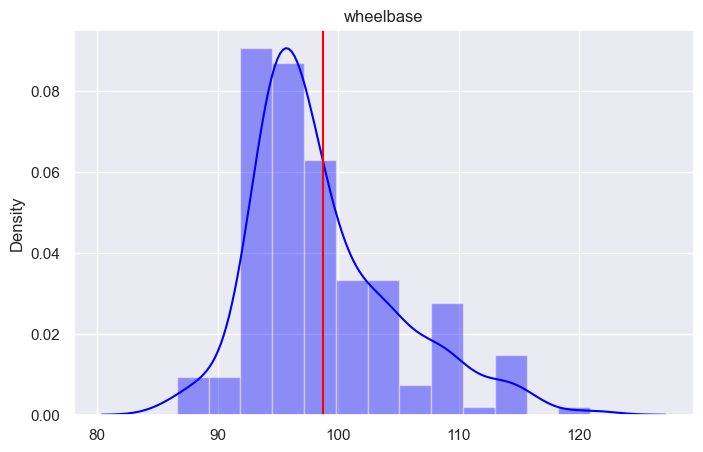

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


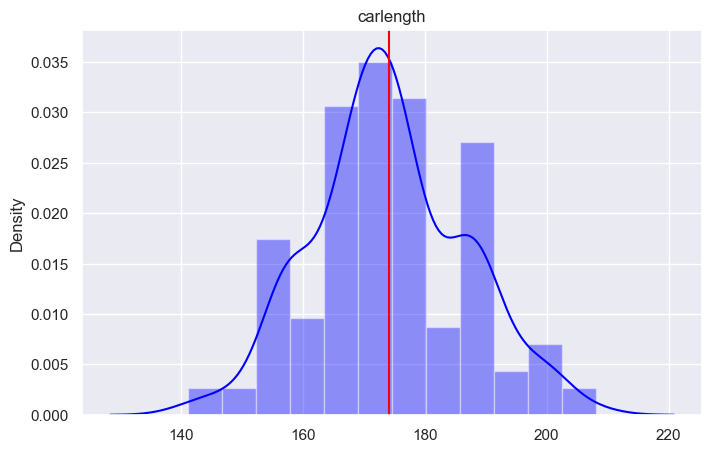

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


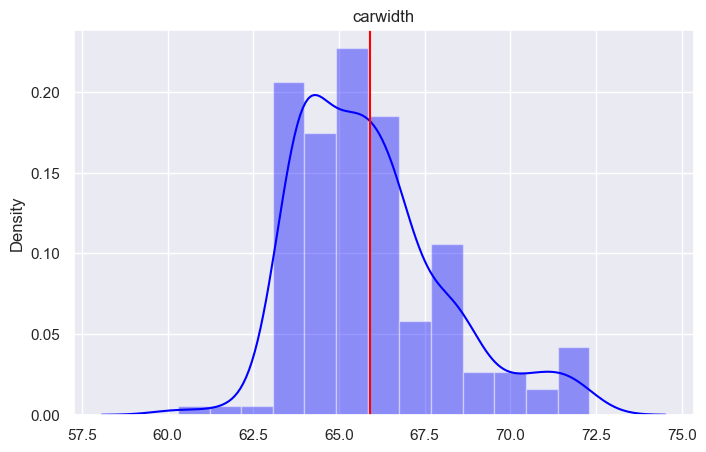

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


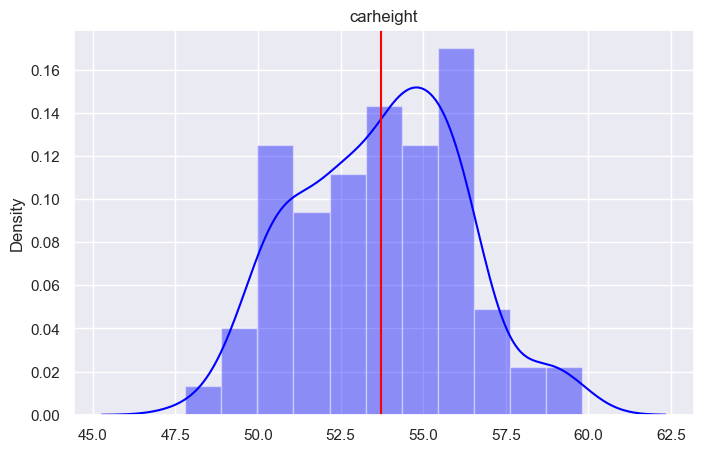

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


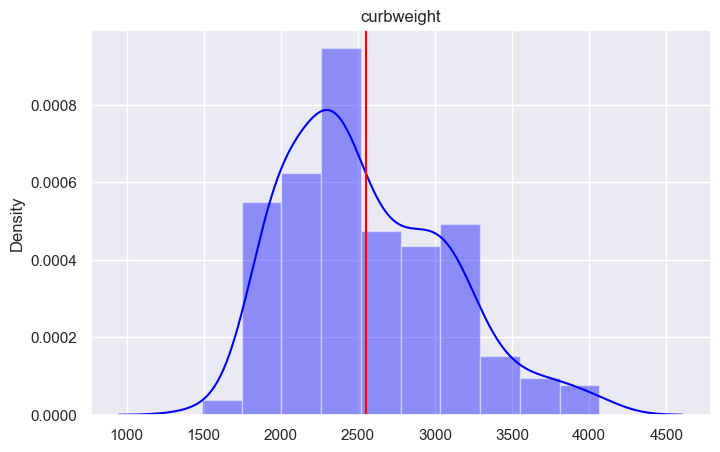

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


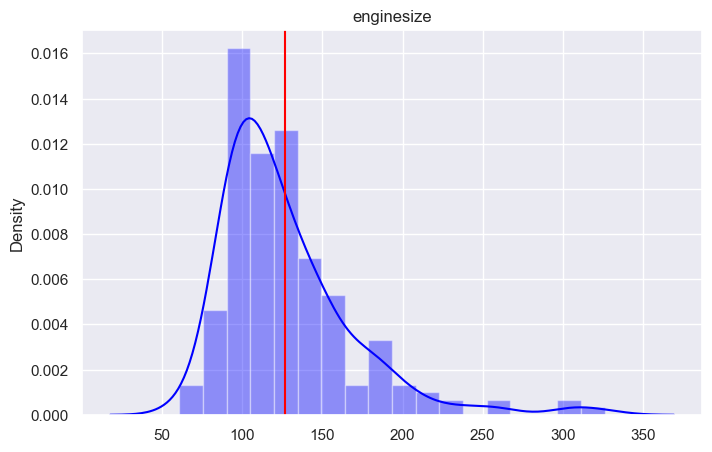

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


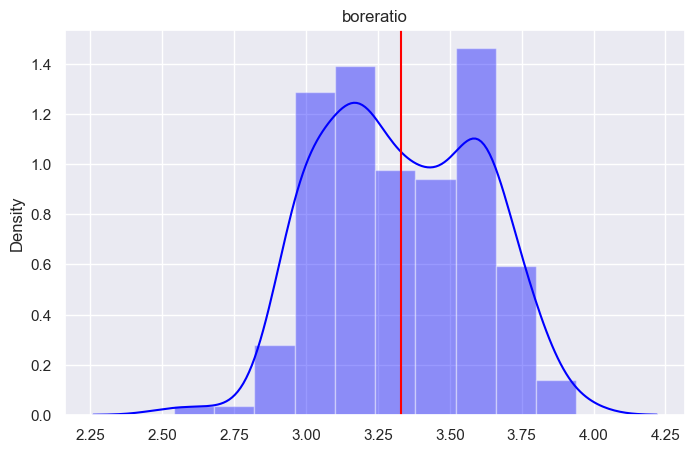

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


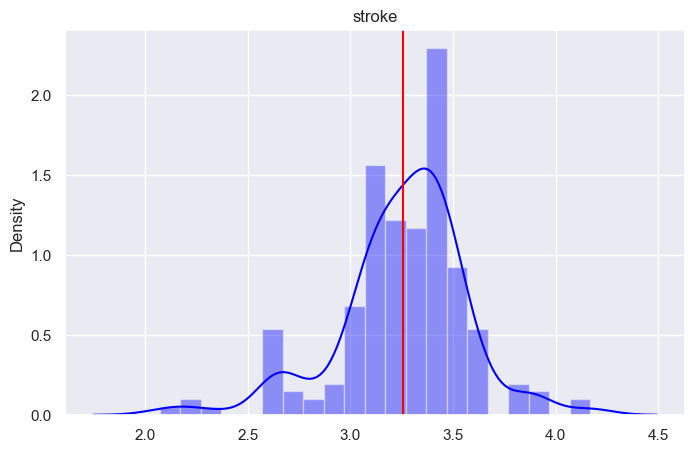

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


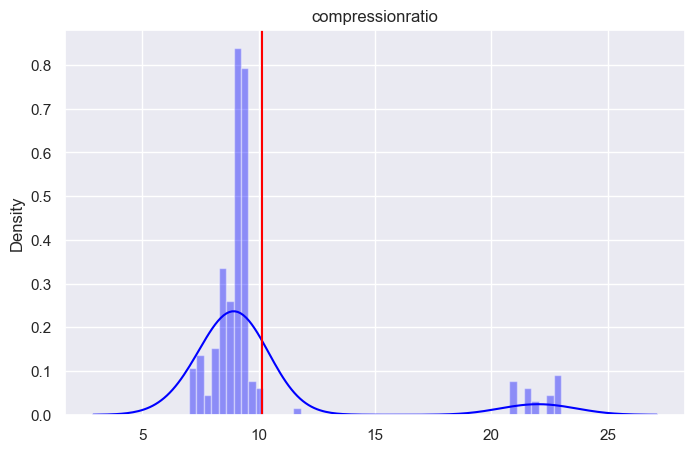

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


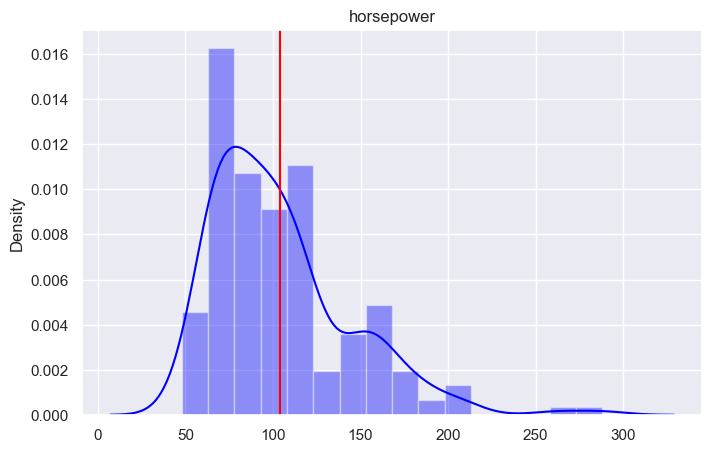

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


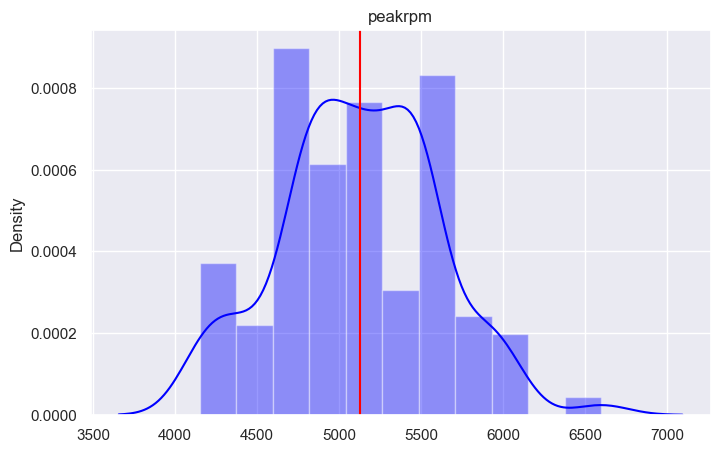

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


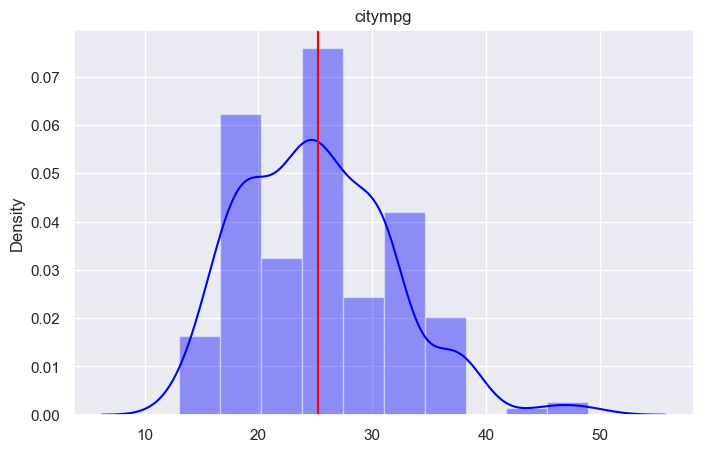

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


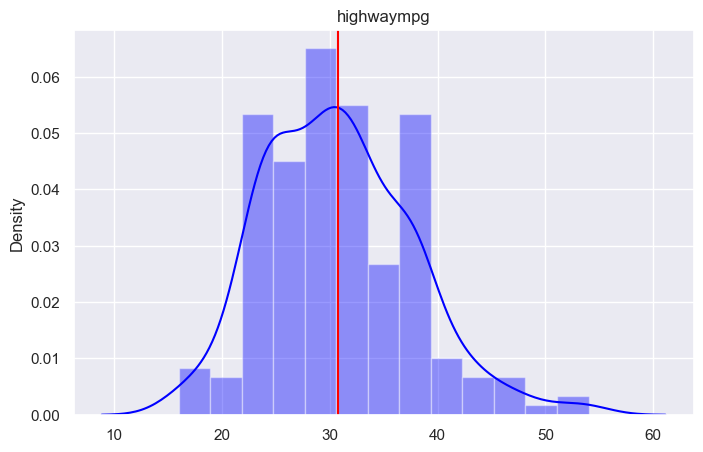

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\3082023666.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


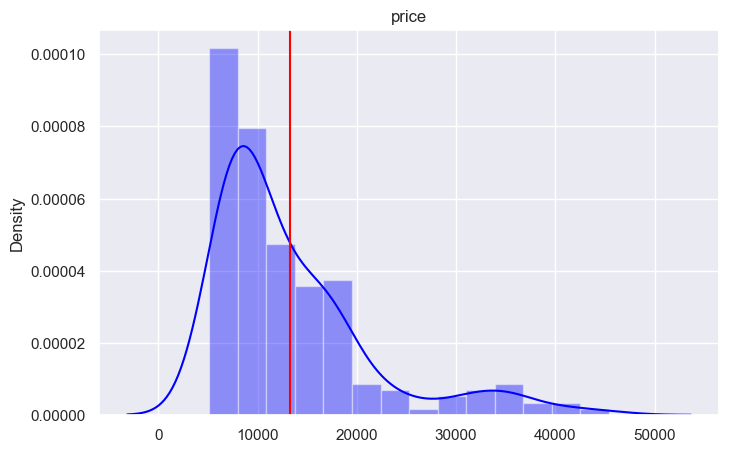

In [16]:
#Investigating the distribution of all fields, adding the mean

# identifying all numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = cars.select_dtypes(include=numerics).columns

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in n_variables:
    x = cars[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = cars[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

The meadian is:  103.0


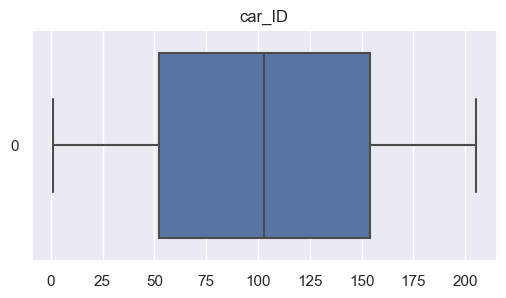

The meadian is:  1.0


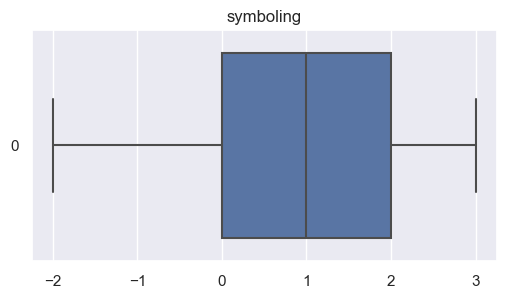

The meadian is:  97.0


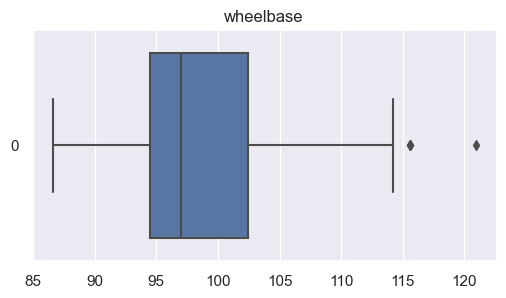

The meadian is:  173.2


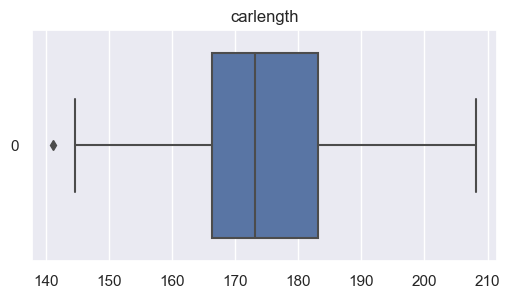

The meadian is:  65.5


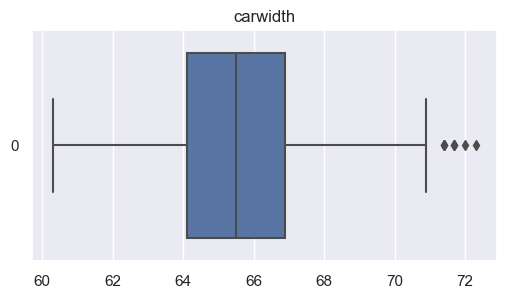

The meadian is:  54.1


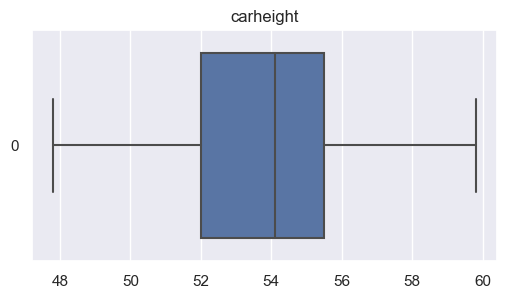

The meadian is:  2414.0


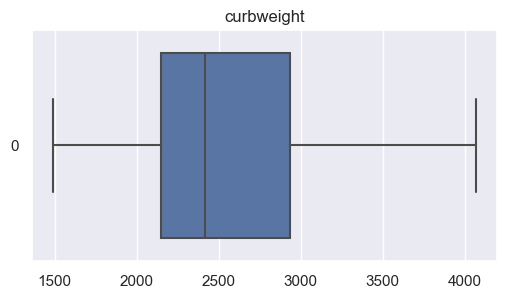

The meadian is:  120.0


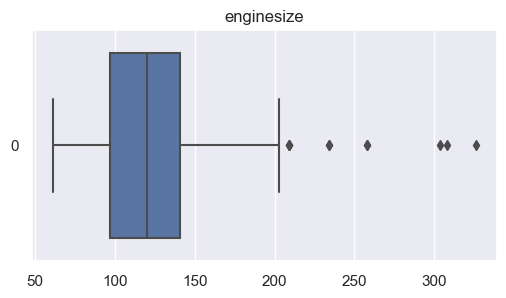

The meadian is:  3.31


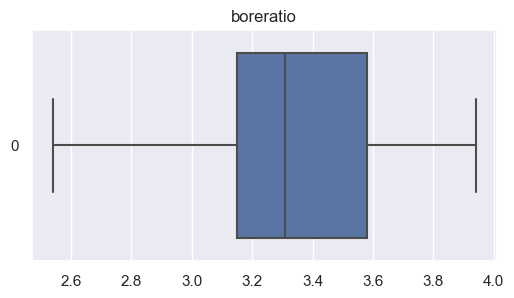

The meadian is:  3.29


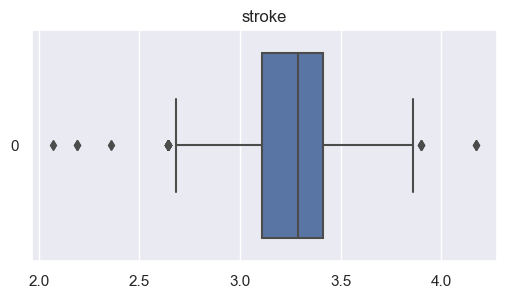

The meadian is:  9.0


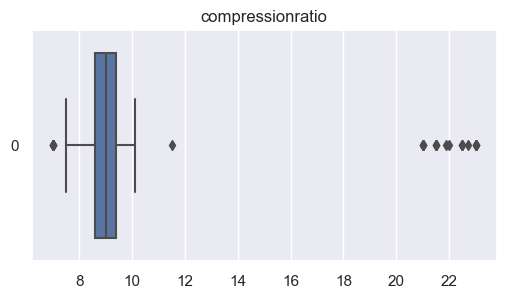

The meadian is:  95.0


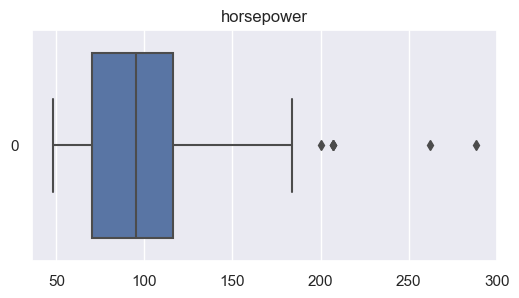

The meadian is:  5200.0


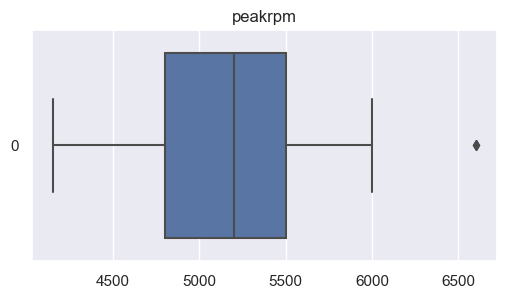

The meadian is:  24.0


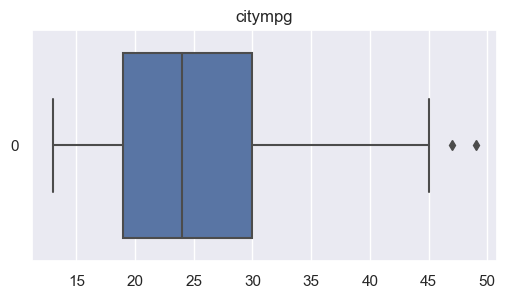

The meadian is:  30.0


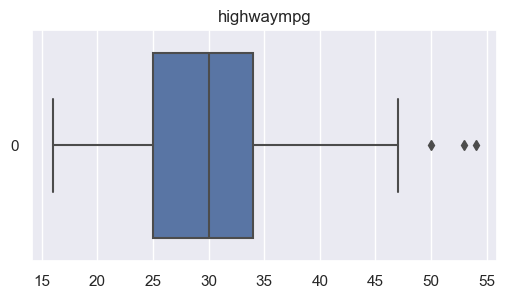

The meadian is:  10295.0


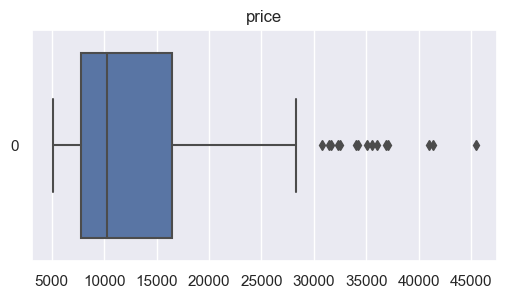

In [17]:
#Investigating the distribution of all Numerical values

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(6,3)})

for c in n_variables:    
    x = cars[c].values
    ax = sns.boxplot(x, orient='h')
    print('The meadian is: ', cars[c].median())
    plt.title(c)
    plt.show()

C:\Users\Prof Mokoena\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Prof Mokoena\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


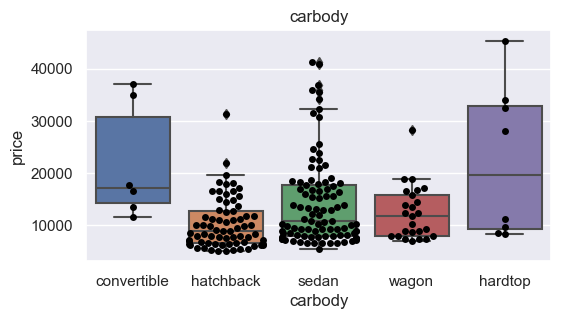

C:\Users\Prof Mokoena\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Prof Mokoena\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


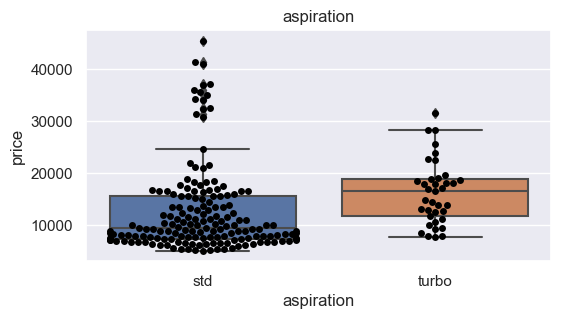

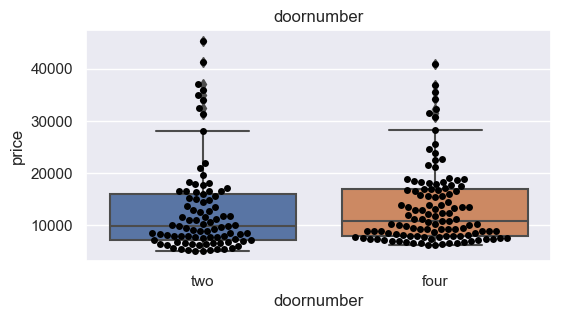

C:\Users\Prof Mokoena\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


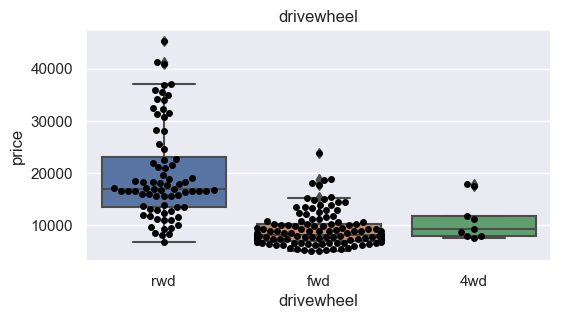

C:\Users\Prof Mokoena\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Prof Mokoena\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


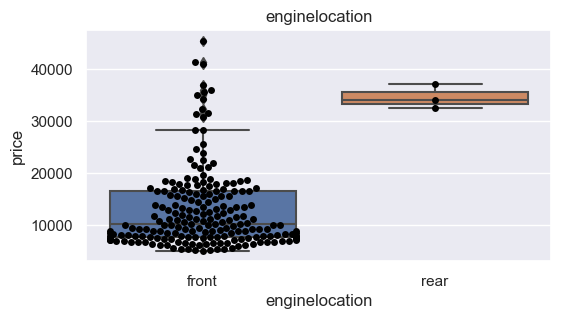

C:\Users\Prof Mokoena\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Prof Mokoena\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


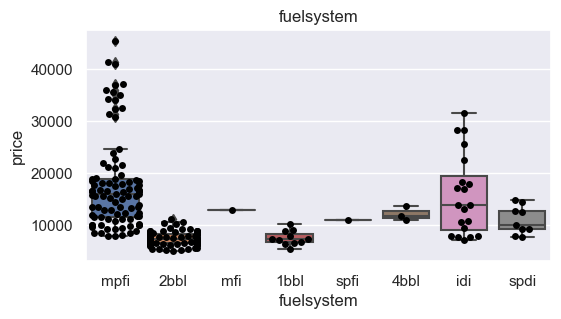

C:\Users\Prof Mokoena\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


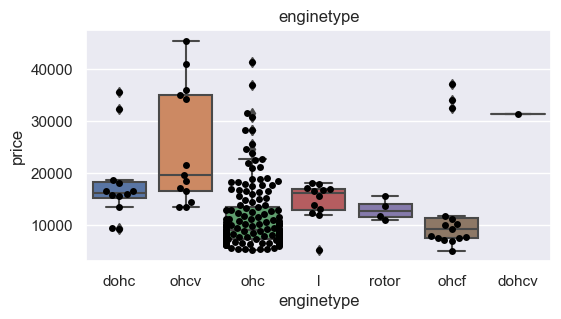

C:\Users\Prof Mokoena\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 54.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


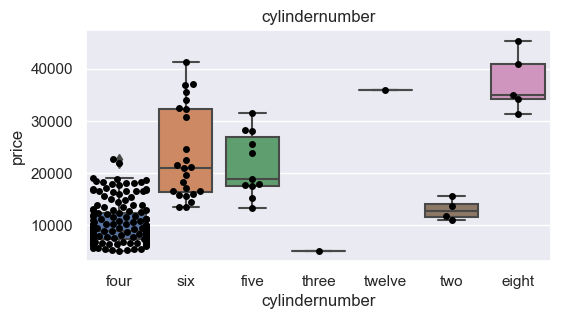

In [18]:
#Investigating the distribution of price by categorical variables - by data points

categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(6,3)})

for c in categories:
    ax = sns.boxplot(x=c, y="price", data=cars)
    ax = sns.swarmplot(x=c, y="price", data=cars, color="black")
    plt.title(c)
    plt.show()

In [19]:
cars.head()

car_ID  symboling      CarName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

In [20]:
cars2 = pd.get_dummies(cars, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])
cars2.head()

car_ID  symboling      CarName  wheelbase  carlength  carwidth  carheight  \
0       1          3  alfa-romero       88.6      168.8      64.1       48.8   
1       2          3  alfa-romero       88.6      168.8      64.1       48.8   
2       3          1  alfa-romero       94.5      171.2      65.5       52.4   
3       4          2         audi       99.8      176.6      66.2       54.3   
4       5          2         audi       99.4      176.6      66.4       54.3   

   curbweight cylindernumber  enginesize  boreratio  stroke  compressionratio  \
0        2548           four         130       3.47    2.68               9.0   
1        2548           four         130       3.47    2.68               9.0   
2        2823            six         152       2.68    3.47               9.0   
3        2337           four         109       3.19    3.40              10.0   
4        2824           five         136       3.19    3.40               8.0   

   horsepower  peakrpm  citympg  highwaympg    price  carbody_convertible  \
0         111     5000       21          27  13495.0                    1   
1         111     5000       21          27  16500.0                    1   
2         154     5000       19          26  16500.0                    0   
3         102     5500       24          30  13950.0                    0   
4         115     5500       18          22  17450.0                    0   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0                0                  0              0              0   
1                0                  0              0              0   
2                0                  1              0              0   
3                0                  0              1              0   
4                0                  0              1              0   

   aspiration_std  aspiration_turbo  doornumber_four  doornumber_two  \
0               1                 0                0               1   
1               1                 0                0               1   
2               1                 0                0               1   
3               1                 0                1               0   
4               1                 0                1               0   

   drivewheel_4wd  drivewheel_fwd  drivewheel_rwd  enginelocation_front  \
0               0               0               1                     1   
1               0               0               1                     1   
2               0               0               1                     1   
3               0               1               0                     1   
4               1               0               0                     1   

   enginelocation_rear  fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  enginetype_dohc  enginetype_dohcv  enginetype_l  \
0                0                1                 0             0   
1                0                1                 0             0   
2                0                0                 0             0   
3                0                0                 0             0   
4               

In [21]:
cars2 = pd.get_dummies(cars, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])

cars2['cylindernumber'].loc[cars2['cylindernumber'] == 'two'] = 2
cars2['cylindernumber'].loc[cars2['cylindernumber'] == 'three'] = 3
cars2['cylindernumber'].loc[cars2['cylindernumber'] == 'four'] = 4
cars2['cylindernumber'].loc[cars2['cylindernumber'] == 'five'] = 5
cars2['cylindernumber'].loc[cars2['cylindernumber'] == 'six'] = 6
cars2['cylindernumber'].loc[cars2['cylindernumber'] == 'eight'] = 8
cars2['cylindernumber'].loc[cars2['cylindernumber'] == 'twelve'] = 12
cars2['cylindernumber']=cars2['cylindernumber'].astype(int)

warnings.simplefilter(action='ignore', category=FutureWarning)

cars2.dtypes

C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\708171325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars2['cylindernumber'].loc[cars2['cylindernumber'] == 'two'] = 2
C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\708171325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars2['cylindernumber'].loc[cars2['cylindernumber'] == 'three'] = 3
C:\Users\Prof Mokoena\AppData\Local\Temp\ipykernel_5196\708171325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

car_ID                    int64
symboling                 int64
CarName                  object
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int32
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelocation_front      uint8
enginelo

## Heatmap

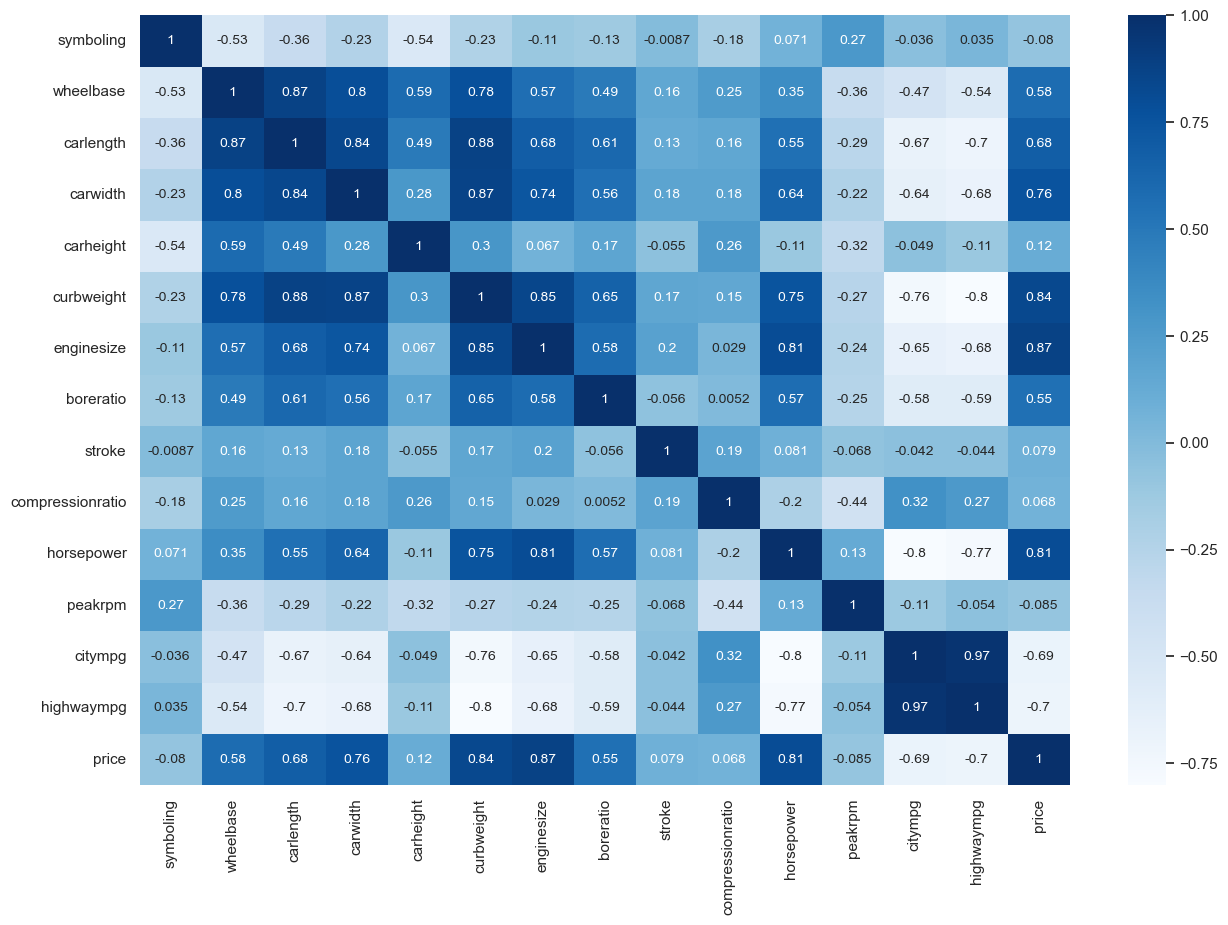

In [22]:
#Heatmap 

# droping columns we don't need
#del new_raw_data['car_ID']
del cars2['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

pc = cars2[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

In [20]:
from sklearn.model_selection import train_test_split # Splitting into train-test

In [23]:
dummy = pd.get_dummies(cars2, drop_first=True) # Dummy variables for non continous values
dummy.shape
x = dummy.drop(columns = ['price'], axis = 1)
y = dummy.price
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.80, test_size = 0.2, random_state = 100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 47), (41, 47), (164,), (41,))

<Axes: >

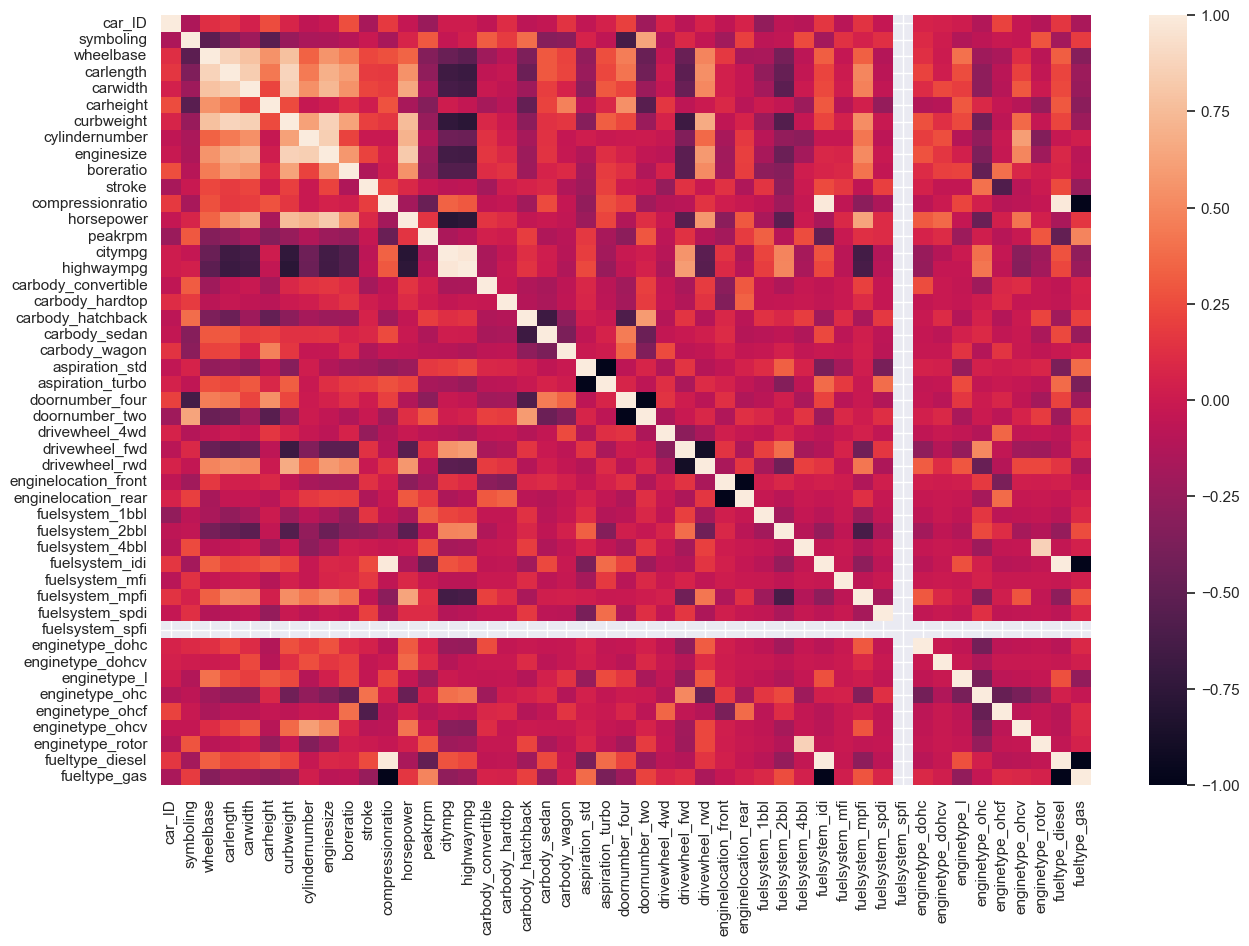

In [24]:
corr = X_train.corr()
sns.heatmap(corr)

In [28]:
# Function to determine most correlated features
def correlation(data, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (abs(corr_mat.iloc[i,j]) > threshold):
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [27]:
correlated_features = correlation(data = X_train, threshold = 0.85)
set(correlated_features)

{'aspiration_turbo',
 'carlength',
 'curbweight',
 'doornumber_two',
 'drivewheel_rwd',
 'enginelocation_rear',
 'enginesize',
 'enginetype_rotor',
 'fuelsystem_idi',
 'fueltype_diesel',
 'fueltype_gas',
 'highwaympg'}

In [29]:
# Droping the highly correlated features as they share common impact
X_train.drop(labels = correlated_features, axis = 1, inplace = True)
X_test.drop(labels = correlated_features, axis = 1, inplace = True)
X_train.shape, X_test.shape

((164, 35), (41, 35))

In [31]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [32]:
scaled_X_train = scale.fit_transform(X_train)
scaled_X_test = scale.fit_transform(X_test)

In [34]:
# Determing most important features
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=100)
model_rf = rf.fit(scaled_X_train,y_train)

feature_names = dummy.columns
for name, importance in zip(feature_names, model_rf.feature_importances_):
    print(name, "=", importance)

print('The Accuracy  on the testing dataset is: ',model_rf.score(scaled_X_test , y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,model_rf.predict(scaled_X_test ))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,model_rf.predict(scaled_X_test )))

car_ID = 0.02067168711339997
symboling = 0.003016114562185134
wheelbase = 0.04372993407772255
carlength = 0.1431907895646267
carwidth = 0.005951844365316262
carheight = 0.29465635359087683
curbweight = 0.09998231973072011
cylindernumber = 0.0069705569079103755
enginesize = 0.009691184970184225
boreratio = 0.22768903729898823
stroke = 0.014555386664626102
compressionratio = 0.11111607764016368
horsepower = 0.00033617587132428635
peakrpm = 0.00036678930392735015
citympg = 0.0018802071302501237
highwaympg = 0.0013281242692999243
price = 0.00040706710404045133
carbody_convertible = 0.003123657215275625
carbody_hardtop = 0.0004549134468125688
carbody_hatchback = 0.0005170686473375509
carbody_sedan = 0.0031904396623189672
carbody_wagon = 0.0017848681609360293
aspiration_std = 1.3845484233766598e-05
aspiration_turbo = 0.000350600445086352
doornumber_four = 7.085287964291808e-05
doornumber_two = 2.5734471219439948e-05
drivewheel_4wd = 0.0015973756748305064
drivewheel_fwd = 2.7348984900682027e-

<Axes: >

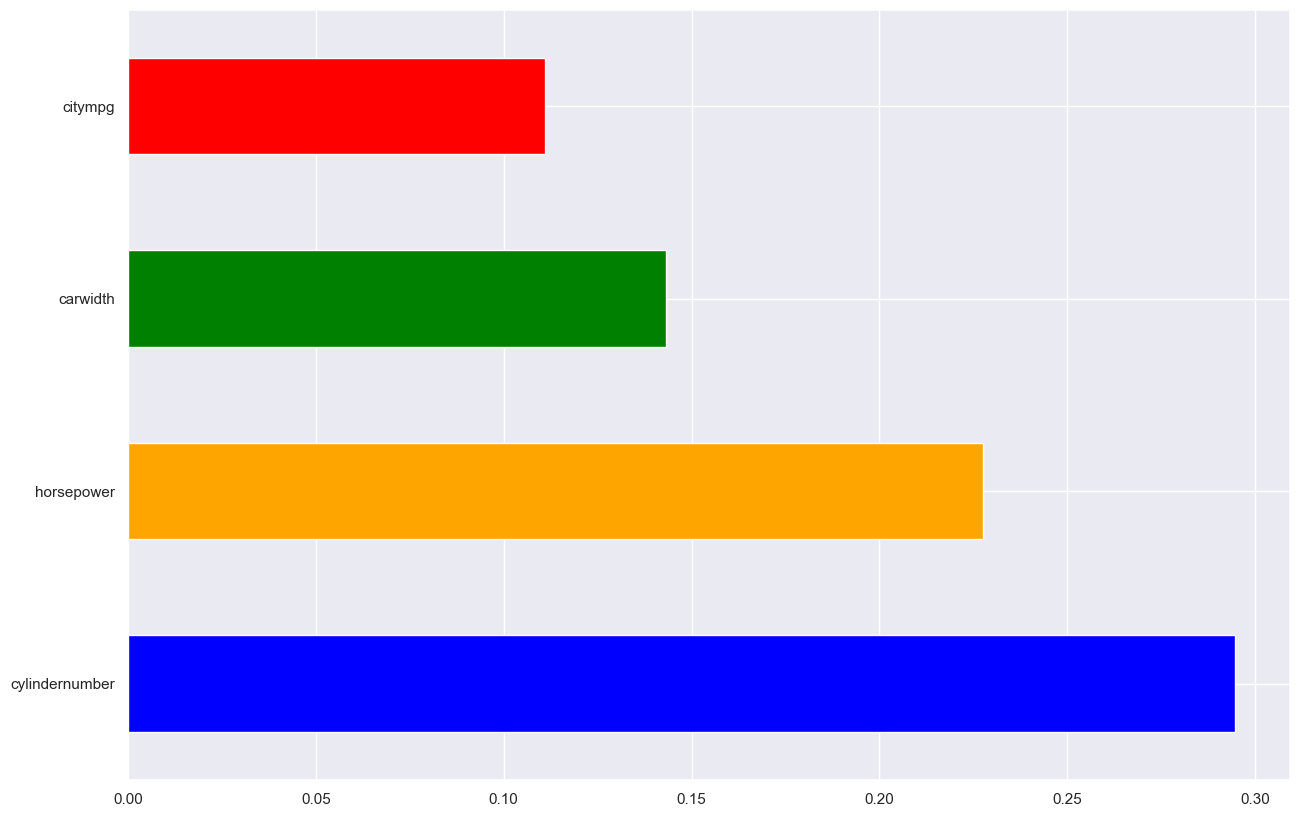

In [35]:
# Visualizing important features
feat_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(4).plot(kind='barh', color=['blue', 'orange', 'green','red'])

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = model_rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(scaled_X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [37]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=300, random_state=100)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

best_grid = grid_search.best_estimator_

model_rf = best_grid
model_rf.fit(scaled_X_train, y_train)

y_pred = model_rf.predict(scaled_X_train)

# Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is:', model_rf.score(scaled_X_test, y_test))
print('The RMSE on the testing dataset is:', np.sqrt(mean_squared_error(y_test, model_rf.predict(scaled_X_test))))
print('The MAE on the testing dataset is:', mean_absolute_error(y_test, model_rf.predict(scaled_X_test)))


The Accuracy on the testing dataset is: 0.7185171976474752
The RMSE on the testing dataset is: 4656.725418999554
The MAE on the testing dataset is: 2989.9177367157113


In [40]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model_lr = LinearRegression()

# Fit the model to the scaled training data and target variable
model_lr.fit(scaled_X_train, y_train)

# Get the coefficient values for each feature
feature_names = dummy.columns
coefficients = model_lr.coef_

# Print feature names and their corresponding coefficients
for name, coef in zip(feature_names, coefficients):
    print(name, "=", coef)
    

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', model_lr.score(scaled_X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,model_lr.predict(scaled_X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,model_lr.predict(scaled_X_test)))

car_ID = -1050.707056647576
symboling = 712.0549469355132
wheelbase = 2092.04263517445
carlength = 1159.8572749332423
carwidth = 315.9508312791112
carheight = 2346.1658953140136
curbweight = 807.613041093897
cylindernumber = -216.47342121342592
enginesize = -3638.2689679168407
boreratio = 3122.8152409913687
stroke = 140.1862868880599
compressionratio = 1454.6893063048872
horsepower = 941.117545197018
peakrpm = -270.5989852706636
citympg = -130.74995042662064
highwaympg = 18.38202599542243
price = -197.27207758838514
carbody_convertible = -102.60371468898586
carbody_hardtop = 396.79421755686934
carbody_hatchback = -417.0615917012727
carbody_sedan = -1500.9783812298047
carbody_wagon = -1314.4326497765667
aspiration_std = -3147.7515147431245
aspiration_turbo = -6145.742191754424
doornumber_four = -1827.7911887462724
doornumber_two = -1282.943349443194
drivewheel_4wd = -6203.254558732658
drivewheel_fwd = -2938.075256838492
drivewheel_rwd = -2.7284841053187847e-12
enginelocation_front = -19

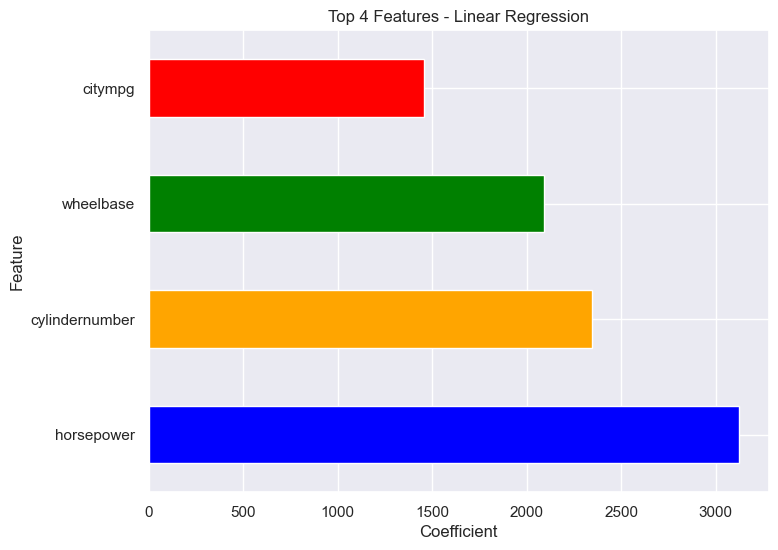

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pandas Series with feature coefficients
feat_coefficients = pd.Series(model_lr.coef_, index=X_train.columns)

# Select the top 4 features with the largest coefficients
top_features = feat_coefficients.nlargest(4)

# Plot the top features
plt.figure(figsize=(8, 6))
top_features.plot(kind='barh', color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 4 Features - Linear Regression')
plt.show()


In [45]:
from sklearn.model_selection import GridSearchCV


# Create a linear regression model

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'fit_intercept': [True, False]
}

# Perform grid search using the parameter grid
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=3)
grid_search_lr.fit(scaled_X_train, y_train)

# Get the best estimator and its corresponding parameters
best_model_lr = grid_search_lr.best_estimator_
best_params_lr = grid_search_lr.best_params_

# Fit the best model to the scaled training data and target variable
best_model_lr.fit(scaled_X_train, y_train)

# Get the coefficient values for each feature
feature_names = dummy.columns
coefficients = best_model_lr.coef_

# Print feature names and their corresponding coefficients
for name, coef in zip(feature_names, coefficients):
    print(name, "=", coef)

# Model evaluation on the testing dataset
y_pred = best_model_lr.predict(scaled_X_test)
accuracy = best_model_lr.score(scaled_X_test, y_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print('The Accuracy on the testing dataset is:', accuracy)
print('The RMSE on the testing dataset is:', rmse)
print('The MAE on the testing dataset is:', mae)



car_ID = -1050.707056647576
symboling = 712.0549469355132
wheelbase = 2092.04263517445
carlength = 1159.8572749332423
carwidth = 315.9508312791112
carheight = 2346.1658953140136
curbweight = 807.613041093897
cylindernumber = -216.47342121342592
enginesize = -3638.2689679168407
boreratio = 3122.8152409913687
stroke = 140.1862868880599
compressionratio = 1454.6893063048872
horsepower = 941.117545197018
peakrpm = -270.5989852706636
citympg = -130.74995042662064
highwaympg = 18.38202599542243
price = -197.27207758838514
carbody_convertible = -102.60371468898586
carbody_hardtop = 396.79421755686934
carbody_hatchback = -417.0615917012727
carbody_sedan = -1500.9783812298047
carbody_wagon = -1314.4326497765667
aspiration_std = -3147.7515147431245
aspiration_turbo = -6145.742191754424
doornumber_four = -1827.7911887462724
doornumber_two = -1282.943349443194
drivewheel_4wd = -6203.254558732658
drivewheel_fwd = -2938.075256838492
drivewheel_rwd = -2.7284841053187847e-12
enginelocation_front = -19

In [46]:
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LinearRegression()

In [47]:
model_lr.fit(scaled_X_train,y_train)
linear_score = model_lr.score(scaled_X_test,y_test)

In [48]:
random_forest_score = model_rf.score(scaled_X_test,y_test)

In [49]:
# Data frame to View top scores
Score = pd.DataFrame({'Model':['Linear Regression','Random Forest'],
                      'Scores':[linear_score,random_forest_score]})
Score

Model    Scores
0  Linear Regression  0.665514
1      Random Forest  0.718517

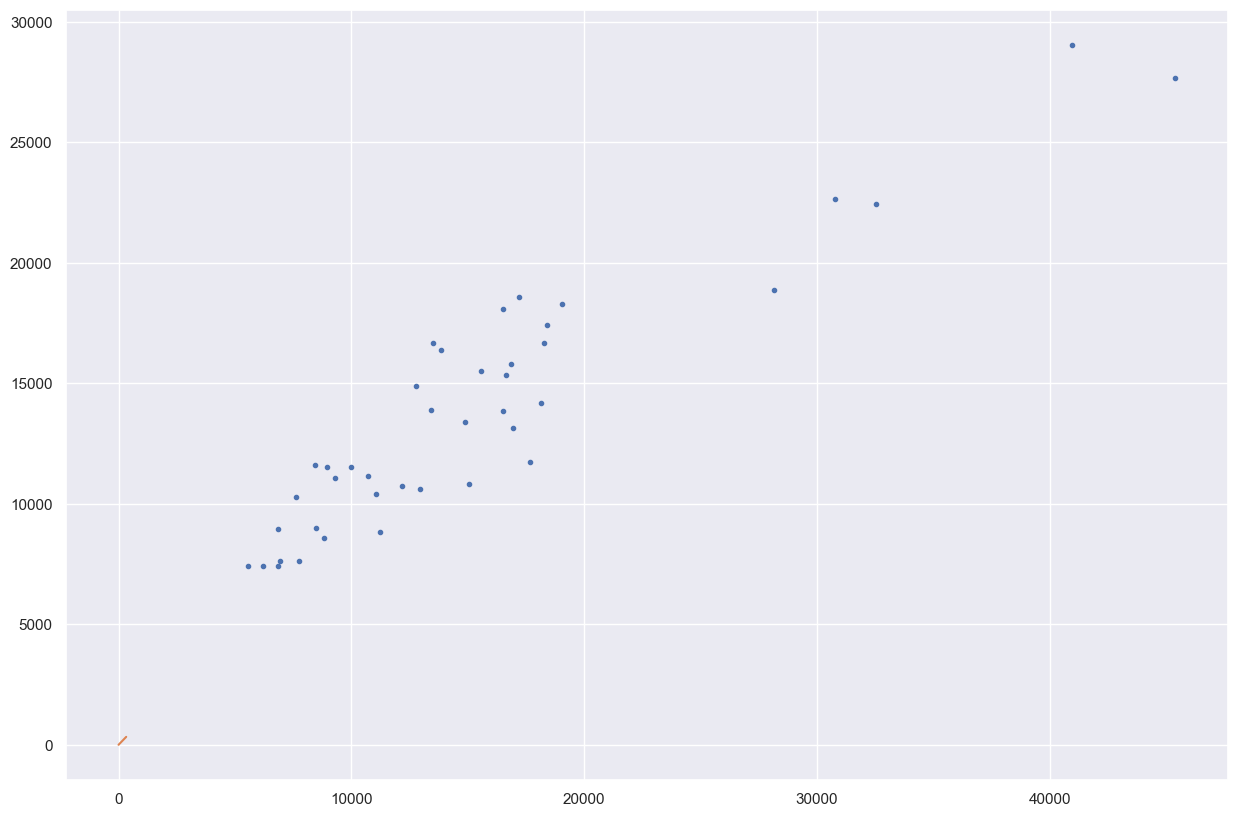

In [50]:
# Plotting the predicted values vs the actual values
y_pred = model_rf.predict(scaled_X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()